# The comparison of tropical precipitation histograms for different climate models

# Structure

1. [The load of packages, modules, and data](#1-load-of-packages-modules-and-data)

2. [Initialization of precipitation diagnostic and setting the class attributes](#2-initializing-the-class-object-and-setting-the-class-attributes)

3. [Calculation of histogram of tropical precipitation](#3-calculating-the-histograms-of-tropical-precipitation)
 
4. [Comparison of tropical precipitation histograms of different climate models](#4-comparing-the-plots-for-different-data)


## 1. Daily-data comparison

In [1]:
import sys

from aqua import Reader
sys.path.insert(0, '../')
from tropical_rainfall_class import TR_PR_Diagnostic as TR_PR_Diag

FDB5 binary library not present on system, disabling FDB support.


#### Monthly data

In [5]:
reader = Reader(model="ICON", exp="ngc2009", source="lra-r100-monthly")
icon = reader.retrieve()

In [13]:
reader = Reader(model="IFS", exp="tco2559-ng5", source="lra-r100-monthly")
ifs = reader.retrieve()

In [14]:
reader = Reader(model="MSWEP", exp="past", source="monthly", regrid="r100")
mswep = reader.retrieve(regrid=True)

## 2. Initializing the class object and setting the class attributes

In [ ]:
diag = TR_PR_Diag(trop_lat=15,  num_of_bins = 20, first_edge = 0, width_of_bin = 1*10**(-6)/15)

In [ ]:
ifs_chunk = ifs["tprate"].sel(time=slice('2020-06','2020-08') )
icon_chunk = icon["tprate"].sel(time=slice('2020-06','2020-08') )
mswep_chunk = mswep["tprate"].sel(time=slice('2020-06','2020-08') )

In [ ]:
mswep_chunk.units, ifs_chunk.units, icon_chunk.units

('m s**-1', 'm s**-1', 'm s**-1')

## 3. Calculating the histograms of tropical precipitation

In [ ]:
hist_icon = diag.histogram(icon_chunk)
hist_icon

<xarray.Dataset>
Dimensions:        (center_of_bin: 20)
Coordinates:
  * center_of_bin  (center_of_bin) float64 3.333e-08 1e-07 ... 1.233e-06 1.3e-06
    width          (center_of_bin) float64 6.667e-08 6.667e-08 ... 6.667e-08
Data variables:
    Counts         (center_of_bin) float64 1.376e+04 4.975e+03 ... 0.0 0.0
    Frequency      (center_of_bin) float64 0.6372 0.2303 0.09116 ... 0.0 0.0 0.0
    Pdf            (center_of_bin) float64 9.558e+06 3.455e+06 ... 0.0 0.0
Attributes: (12/15)
    cell_methods:                 t: mean
    long_name:                    Mean total precipitation rate
    number_of_grid_in_reference:  1
    param:                        52.1.0
    standard_name:                pr
    units:                        m s**-1
    ...                           ...
    shortName:                    tprate
    factor:                       0.001
    offset:                       0
    src_units:                    kg m-2 s-1
    units_fixed:                  1
    OPA:                          monthly mean calculated using one-pass algo...

In [ ]:
hist_ifs = diag.histogram(ifs_chunk)
hist_ifs

<xarray.Dataset>
Dimensions:        (center_of_bin: 20)
Coordinates:
  * center_of_bin  (center_of_bin) float64 3.333e-08 1e-07 ... 1.233e-06 1.3e-06
    width          (center_of_bin) float64 6.667e-08 6.667e-08 ... 6.667e-08
Data variables:
    Counts         (center_of_bin) float64 1.45e+04 3.865e+03 ... 0.0 0.0
    Frequency      (center_of_bin) float64 0.6713 0.1789 0.08819 ... 0.0 0.0 0.0
    Pdf            (center_of_bin) float64 1.007e+07 2.684e+06 ... 0.0 0.0
Attributes: (12/23)
    paramId:                    172228
    dataType:                   fc
    numberOfPoints:             26306560
    typeOfLevel:                surface
    stepUnits:                  1
    stepType:                   instant
    ...                         ...
    factor:                     0.0002777777777777778
    offset:                     0
    decumulated:                1
    src_units:                  m
    units_fixed:                1
    OPA:                        monthly mean calculated using one-pass algorithm

In [ ]:
hist_mswep = diag.histogram(mswep_chunk)
hist_mswep

<xarray.Dataset>
Dimensions:        (center_of_bin: 20)
Coordinates:
  * center_of_bin  (center_of_bin) float64 3.333e-08 1e-07 ... 1.233e-06 1.3e-06
    width          (center_of_bin) float64 6.667e-08 6.667e-08 ... 6.667e-08
Data variables:
    Counts         (center_of_bin) float64 1.402e+04 5.944e+03 ... 0.0 0.0
    Frequency      (center_of_bin) float64 0.649 0.2752 0.06079 ... 0.0 0.0 0.0
    Pdf            (center_of_bin) float64 9.735e+06 4.128e+06 ... 0.0 0.0
Attributes:
    units:        m s**-1
    regridded:    1
    history:      2023-06-13 18:19:46 variable renamed by AQUA fixer;\n2023-0...
    paramId:      172228
    long_name:    Mean total precipitation rate
    cfVarName:    tprate
    shortName:    tprate
    factor:       3.802570537683474e-10
    offset:       0
    src_units:    mm month-1
    units_fixed:  1

## 4. Comparison of tropical precipitation histograms of different climate models 

{<Axes: title={'center': 'Tropical prec'}, xlabel='Precipitation, m s**-1', ylabel='PDF'>,
 <Figure size 640x400 with 1 Axes>}

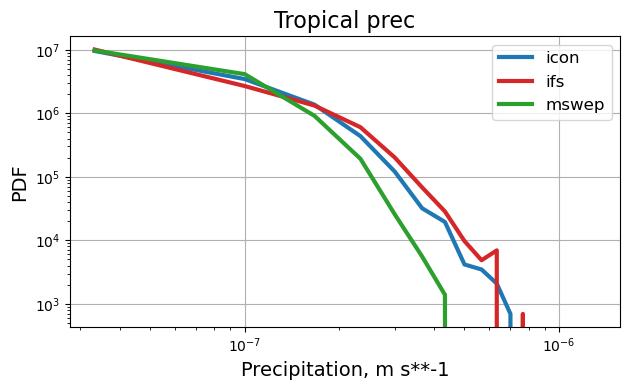

In [ ]:
add = diag.histogram_plot(hist_icon, figsize=0.8, 
               xlogscale = True, ylogscale=True,  legend='icon')
diag.histogram_plot(hist_ifs, smooth = True, add = add, fig=add,  color ='tab:red', 
                  xlogscale = False, legend='ifs') 
diag.histogram_plot(hist_mswep,  smooth = True, add = add, fig=add,  color ='tab:green', xlogscale = False, legend='mswep',
                 plot_title='Tropical prec')